# Regression Using Neural Network
In the code below we would use single layer and one neuron to implement linear regression. We would take an example where we have one feature called size of house and we would predixt price of the house. 

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.layers import Dense, Input
from tensorflow.keras.activations import sigmoid
import logging
logging.getLogger("tensorflow").setLevel(logging.ERROR)
tf.autograph.set_verbosity(0)

Notice that the features as well as labels are represented in matrix. Feature is m x n matrix where m are number of examples in the training set and n are number of features. As in our case number of features is 1 and examples being 2 we have 2 x 1 matrix.
Its intutive that the output or label data would be m x 1 matrix.

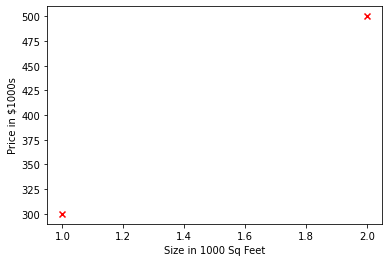

In [2]:
X_train = np.array([[1.0], [2.0]], dtype=np.float32)           #(size in 1000 square feet)
Y_train = np.array([[300.0], [500.0]], dtype=np.float32)       #(price in 1000s of dollars)

fig, ax = plt.subplots(1,1)
ax.scatter(X_train, Y_train, color="r", marker="x")
ax.set_xlabel("Size in 1000 Sq Feet")
ax.set_ylabel("Price in $1000s")
plt.show()

Lets create single layer neural network with one neuron (and hence units=1). Remember the activation function - in our case it would be linear as our prediction would be - wx + b.

In [3]:
linear_layer = tf.keras.layers.Dense(units=1, activation='linear',)

Initially there are no weights (model parameter in regression term - w and b)

In [4]:
linear_layer.get_weights()

[]

Here we are trying to get prediction for one sample input (ideally this should be compile step) - notice that the input is again a matrix. As we have single feature the matrix is 1 x1 but in case on N features it would be n x 1.

In [17]:
a1 = linear_layer(X_train[0].reshape(1,1))
print(a1)

tf.Tensor([[300.]], shape=(1, 1), dtype=float32)


Now we can set some weights for the layer. Note that these weights would be set using training the model which we would see later.

In [6]:
w = np.array([[200]])
b = np.array([100])
linear_layer.set_weights([w,b])
linear_layer.get_weights()

[array([[200.]], dtype=float32), array([100.], dtype=float32)]

In [7]:
a1 = linear_layer(X_train[0].reshape(1,1))
print(a1)

a11 = np.dot(X_train[0], w[0]) + b
print(a11)

tf.Tensor([[300.]], shape=(1, 1), dtype=float32)
[300.]


In [8]:
prediction_tf = linear_layer(X_train)
prediction_np = np.dot( X_train, w) + b

print(prediction_tf)
print(prediction_np)

tf.Tensor(
[[300.]
 [500.]], shape=(2, 1), dtype=float32)
[[300.]
 [500.]]


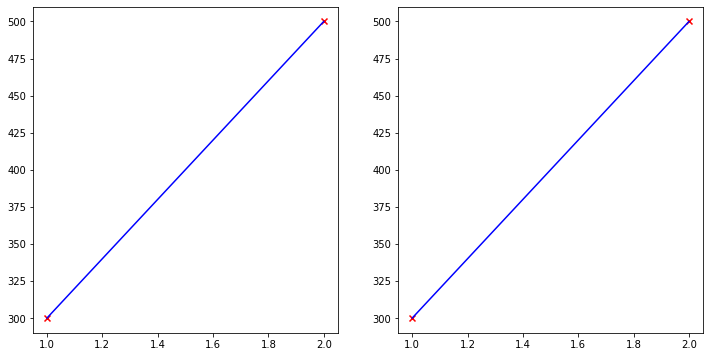

In [16]:
fig, ax = plt.subplots(1,2,figsize=(12, 6))
ax[0].plot(X_train, prediction_np, color="b")
ax[0].scatter(X_train, Y_train, color="r", marker="x")


ax[1].plot(X_train, prediction_tf, color="b")
ax[1].scatter(X_train, Y_train, color="r", marker="x")